# Multiple Linear Regression Model

#                          for

# The Prediction of Demand for Shared Bikes



### Problem Statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.
They want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### Business Goal:
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Let's Get Started

## Importing Useful Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#libraries for modeling

from sklearn.model_selection import train_test_split              # for splitting dataset into test and train data
from sklearn.preprocessing import MinMaxScaler                    # for scaling the numerical values
import statsmodels.api as sm                                      # for fitting the model
from sklearn.feature_selection import RFE                         # for using Recursive Feature Elimination
from sklearn.linear_model import LinearRegression 
from statsmodels.stats.outliers_influence import variance_inflation_factor # for calculating VIF
from sklearn.metrics import r2_score                              #for calculating R-squared score

## Step 1: Reading and Understanding the Data

In [2]:
day_df=pd.read_csv('../dataset/day.csv')

In [3]:
day_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [4]:
day_df.shape

(730, 16)

In [5]:
  day_df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

### Checking Missing values

In [6]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Checking data types

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- columns: season, yr, mnth, holiday, weekday, workingday and weathersit are categorical variables.
- need to convert them into object

In [8]:
to_obj_columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit' ]

In [9]:
day_df[to_obj_columns]=day_df[to_obj_columns].astype(object)

In [10]:
#checking if holiday and workinday are complementary or not
day_df[day_df.workingday==0]

instant      dteday season yr mnth holiday weekday workingday weathersit  \
5          6  06-01-2018      1  0    1       0       6          0          1   
6          7  07-01-2018      1  0    1       0       0          0          2   
12        13  13-01-2018      1  0    1       0       6          0          1   
13        14  14-01-2018      1  0    1       0       0          0          1   
16        17  17-01-2018      1  0    1       1       3          0          2   
..       ...         ...    ... ..  ...     ...     ...        ...        ...   
719      720  21-12-2019      1  1   12       0       6          0          2   
720      721  22-12-2019      1  1   12       0       0          0          1   
723      724  25-12-2019      1  1   12       1       3          0          2   
726      727  28-12-2019      1  1   12       0       6          0          2   
727      728  29-12-2019      1  1   12       0       0          0          2   

          temp     atemp      hum  windspeed  casual  registered   cnt  
5     8.378268  11.66045  51.8261   6.000868      88        1518  1606  
6     8.057402  10.44195  49.8696  11.304642     148        1362  1510  
12    6.765000   7.54415  47.0417  20.167000      38        1368  1406  
13    6.595670   9.42065  53.7826   8.478716      54        1367  1421  
16    7.209153   8.83855  53.7500  12.999139     117         883  1000  
..         ...       ...      ...        ...     ...         ...   ...  
719  13.393347  15.08835  55.6667  25.083661     221        3402  3623  
720  10.899153  11.80565  44.1250  27.292182     205        1544  1749  
723  11.943464  14.72325  73.4783  11.304642     440         573  1013  
726  10.386653  12.75230  59.0000  10.416557     644        2451  3095  
727  10.386653  12.12000  75.2917   8.333661     159        1182  1341  

[226 rows x 16 columns]

**Observations**

- No null values are present
- columns:
    - season, mnth, weekday and weathersit are categorical variables, need conversion to object type.
    - yr,holiday and workingday are binary variables
    - temp, atemp, hum, windspeed ,casual,registered and Cnt are numerical variables
    - cnt is a target variable
    
**Irrelavant variables:**

- **instant** variable because it represents the index

**Unimportant/redundant variables**

- **dteday** column doesn't seem useful as yr and mnth columns are already there. So we can drop it.
- **casual** and **registered** columns as they sum up to cnt and we want to predict the count variable only.

### Dropping  Columns

In [11]:
day_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
bike1=day_df[[ 'season', 'yr', 'mnth', 'holiday','weekday','workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed','cnt']]

In [13]:
#renaming for ease in reading
bike1.rename(columns={'yr':'year','mnth':'month','hum':'humidity','cnt':'count'},inplace=True)

In [14]:
bike1.head()

season year month holiday weekday workingday weathersit       temp  \
0      1    0     1       0       1          1          2  14.110847   
1      1    0     1       0       2          1          2  14.902598   
2      1    0     1       0       3          1          1   8.050924   
3      1    0     1       0       4          1          1   8.200000   
4      1    0     1       0       5          1          1   9.305237   

      atemp  humidity  windspeed  count  
0  18.18125   80.5833  10.749882    985  
1  17.68695   69.6087  16.652113    801  
2   9.47025   43.7273  16.636703   1349  
3  10.60610   59.0435  10.739832   1562  
4  11.46350   43.6957  12.522300   1600

## Step 2: Data Visualization

### Univariate Analysis

#### Visualizing  the numerical variables

In [15]:
num_cols=list(bike1.select_dtypes(['int64','float64']).columns)
num_cols.remove('count')

In [16]:
num_cols

['temp', 'atemp', 'humidity', 'windspeed']

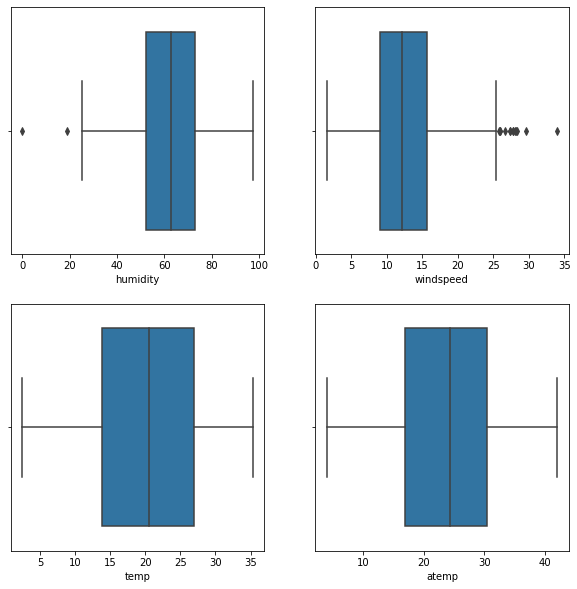

In [17]:
plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
sns.boxplot(bike1.humidity)
plt.subplot(2,2,2)
sns.boxplot(bike1.windspeed)
plt.subplot(2,2,3)
sns.boxplot(bike1.temp)
plt.subplot(2,2,4)
sns.boxplot(bike1.atemp)
plt.show()

**Observations**
- there is no skewness in these variables
- we can see few outliers in humidity and windspeed

#### Visualising Categorical Variables

- No outliers are observed in the boxplots.
- Also, variables season, month, year,holiday,workingDay,weekday and weathersit need to be converted to respected categories.

In [18]:
cat_cols=bike1.select_dtypes(object).columns

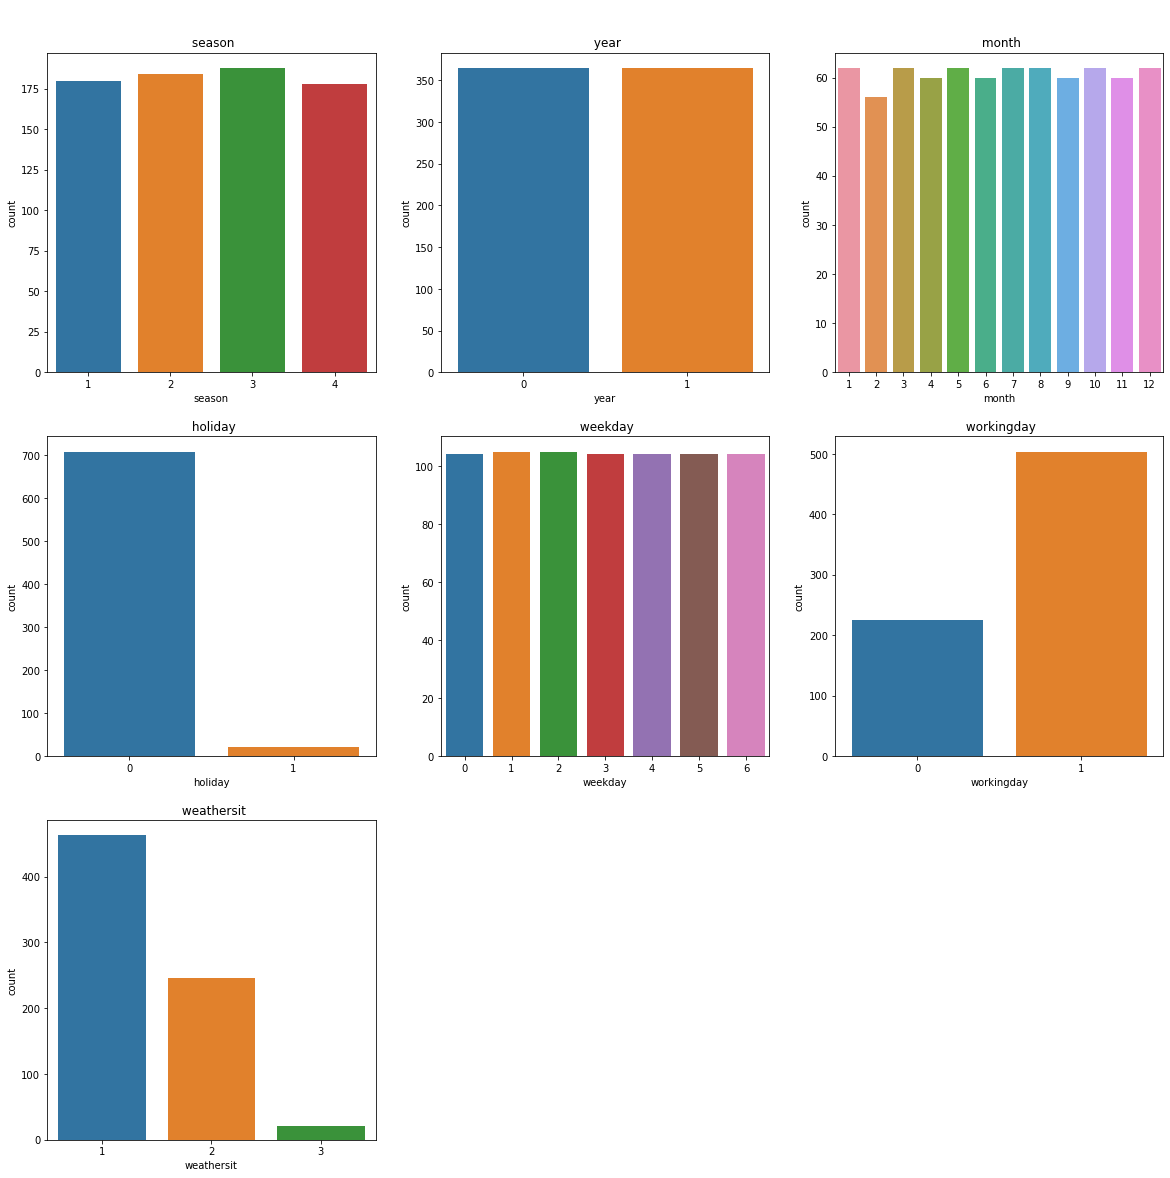

In [19]:
plt.figure(figsize=(20, 20))
for i in range(len(cat_cols)):
    plt.subplot(3,3,i+1)
    sns.countplot(x = cat_cols[i],data = bike1)
    plt.title(f'\n\n {cat_cols[i]}')
plt.show()

**Observation**:
- there is no biaising based on season, year, month and weekday variables.
- Other variables: working day, holiday and weather situation, their distribution is understandable, as everyday can't be a holiday and everyday we don't get rain

### Bivariate Analysis

#### Plotting for Numerical columns

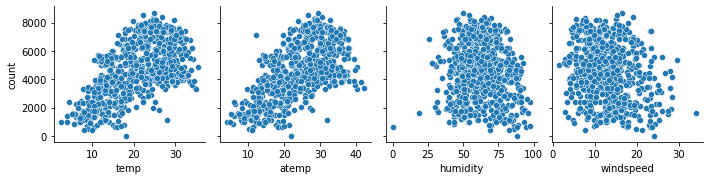

In [20]:
sns.pairplot(bike1,x_vars=num_cols,y_vars=['count'])
plt.show()

**Observation**:
- we can see a clear linear relationship of temp and atemp with count variable
- humidity have weak linear relationship with count variable

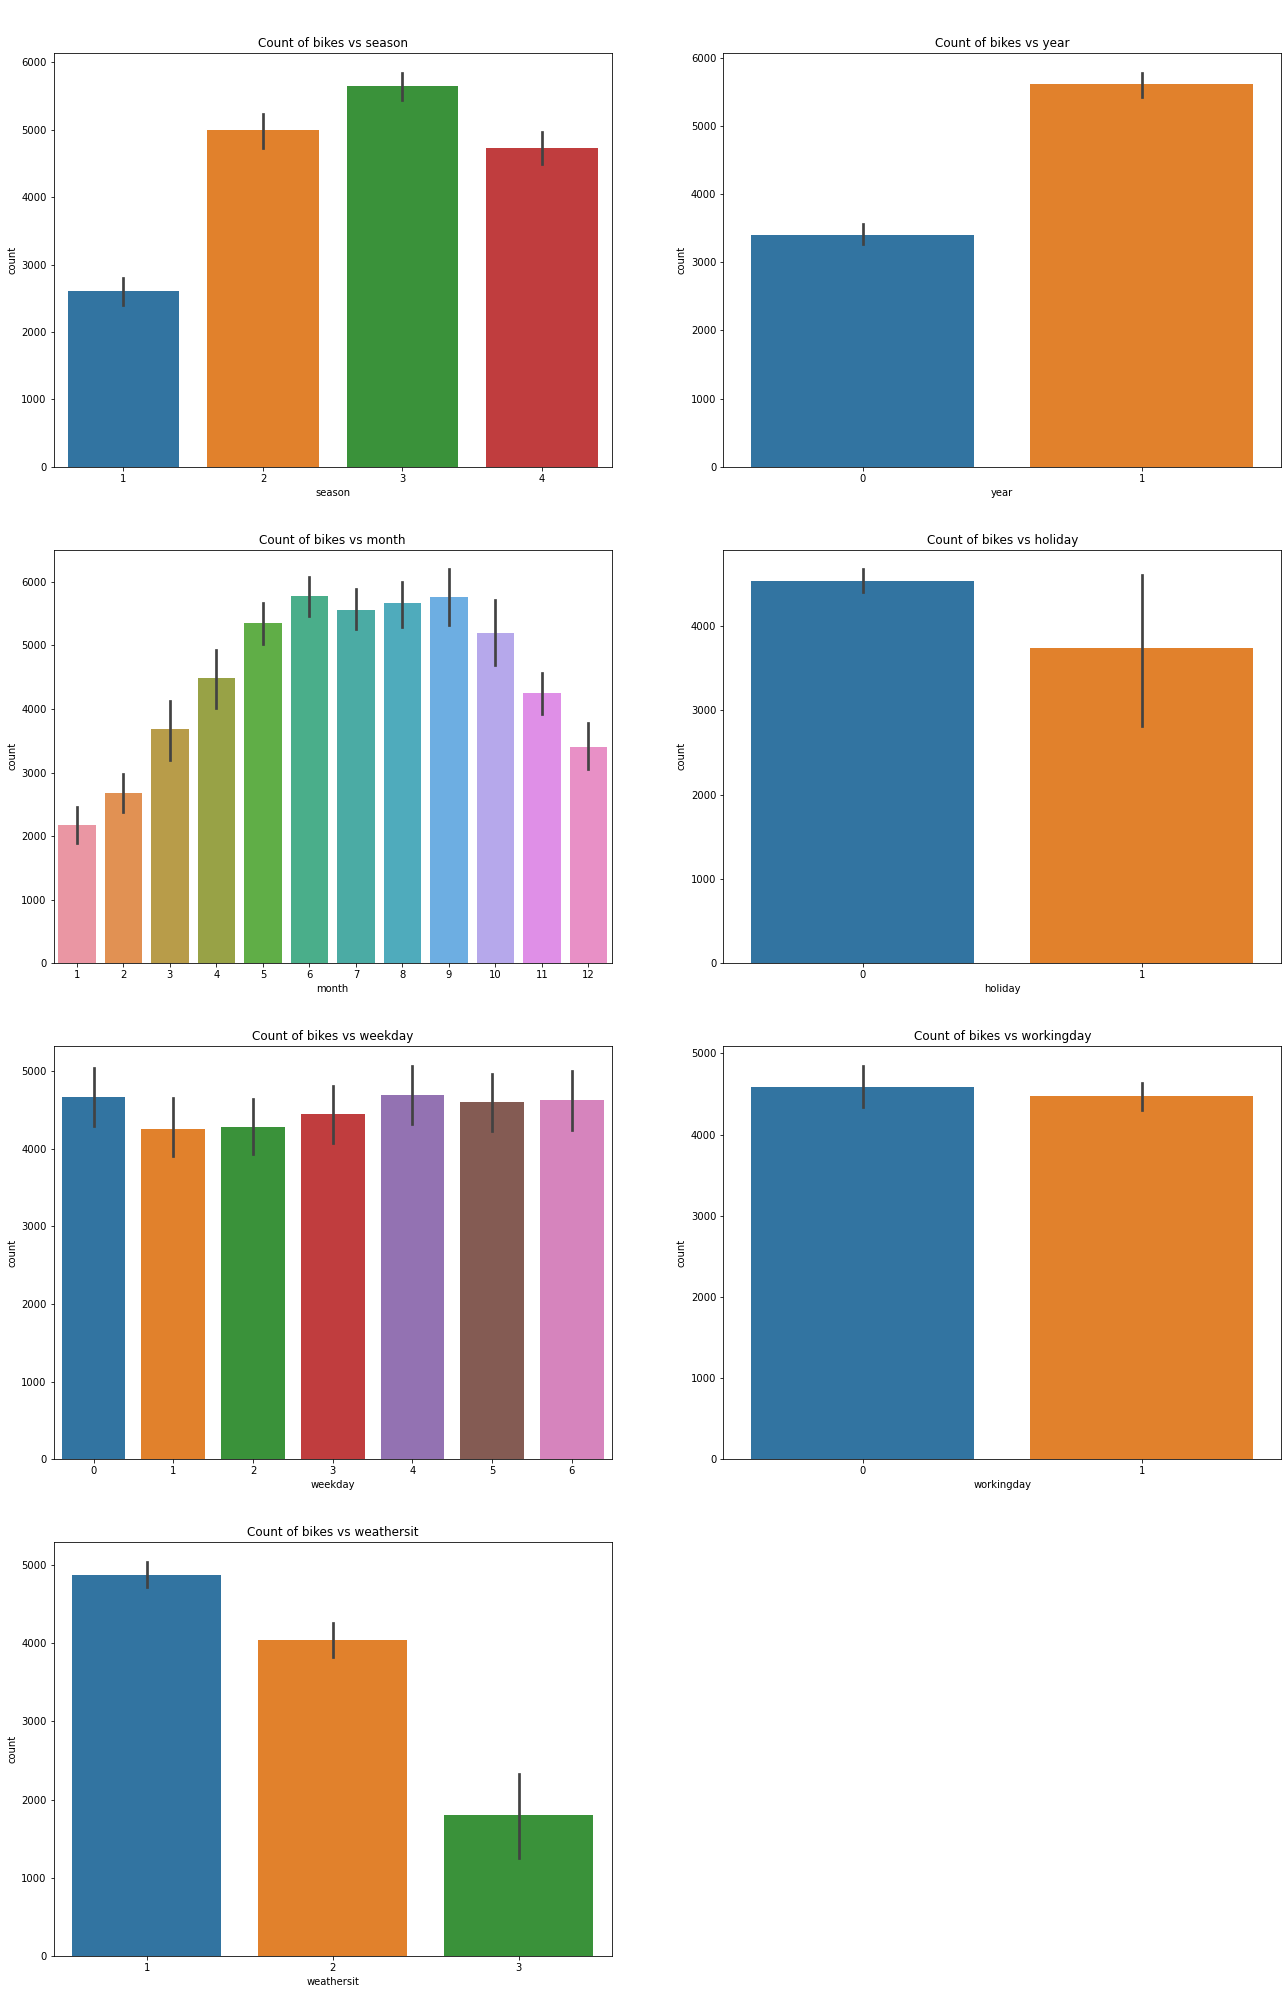

In [21]:
# plt.figure(figsize=[10,20])
plt.figure(figsize=(22, 35))
for i in range(len(cat_cols)):
    plt.subplot(4,2,i+1)
    sns.barplot(x = cat_cols[i], y = 'count', data = bike1)
    plt.title(f'\n\nCount of bikes vs {cat_cols[i]}')
plt.show()

**Observation**:
-

- **Demand of bikes is high**
    - in fall and summer season
    - months from june to september
    - clear weather
    - when it's not a holiday
- Therefore, we can focus on enhancing services to fascinate more users during this period of time
- There is no significant difference between demands on working day and  on non-working day
- People prefer less bike rides during winter season because of cold weather.
- People avoid driving in misty weather (as there is chances of accidents) and in thunderstorms too (which is obvious).

### Checking the correlation coefficients

In [22]:
corr=bike1.corr()

In [23]:
bike1

season year month holiday weekday workingday weathersit       temp  \
0        1    0     1       0       1          1          2  14.110847   
1        1    0     1       0       2          1          2  14.902598   
2        1    0     1       0       3          1          1   8.050924   
3        1    0     1       0       4          1          1   8.200000   
4        1    0     1       0       5          1          1   9.305237   
..     ...  ...   ...     ...     ...        ...        ...        ...   
725      1    1    12       0       5          1          2  10.420847   
726      1    1    12       0       6          0          2  10.386653   
727      1    1    12       0       0          0          2  10.386653   
728      1    1    12       0       1          1          1  10.489153   
729      1    1    12       0       2          1          2   8.849153   

        atemp  humidity  windspeed  count  
0    18.18125   80.5833  10.749882    985  
1    17.68695   69.6087  16.652113    801  
2     9.47025   43.7273  16.636703   1349  
3    10.60610   59.0435  10.739832   1562  
4    11.46350   43.6957  12.522300   1600  
..        ...       ...        ...    ...  
725  11.33210   65.2917  23.458911   2114  
726  12.75230   59.0000  10.416557   3095  
727  12.12000   75.2917   8.333661   1341  
728  11.58500   48.3333  23.500518   1796  
729  11.17435   57.7500  10.374682   2729  

[730 rows x 12 columns]

In [24]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
mask

array([[1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1.]])

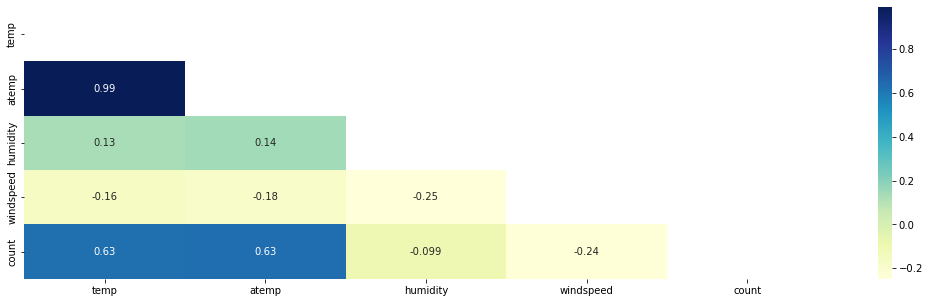

In [25]:
plt.figure(figsize = (18, 5))
sns.heatmap(bike1.corr(), mask=mask,annot = True, cmap="YlGnBu")
plt.show()

**Observations:**
- **temp** and **atemp** variables are highly correlated with count
- Also **temp** and **atemp** variables are also highly correlated with each other. Hence, one needs to be dropped.

In [26]:
bike1=bike1.drop('atemp',axis=1)
bike1

season year month holiday weekday workingday weathersit       temp  \
0        1    0     1       0       1          1          2  14.110847   
1        1    0     1       0       2          1          2  14.902598   
2        1    0     1       0       3          1          1   8.050924   
3        1    0     1       0       4          1          1   8.200000   
4        1    0     1       0       5          1          1   9.305237   
..     ...  ...   ...     ...     ...        ...        ...        ...   
725      1    1    12       0       5          1          2  10.420847   
726      1    1    12       0       6          0          2  10.386653   
727      1    1    12       0       0          0          2  10.386653   
728      1    1    12       0       1          1          1  10.489153   
729      1    1    12       0       2          1          2   8.849153   

     humidity  windspeed  count  
0     80.5833  10.749882    985  
1     69.6087  16.652113    801  
2     43.7273  16.636703   1349  
3     59.0435  10.739832   1562  
4     43.6957  12.522300   1600  
..        ...        ...    ...  
725   65.2917  23.458911   2114  
726   59.0000  10.416557   3095  
727   75.2917   8.333661   1341  
728   48.3333  23.500518   1796  
729   57.7500  10.374682   2729  

[730 rows x 11 columns]

## Step 3:Data Preparation

### Making dummy variables for categorical variables

In [27]:
bike1['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [28]:
bike1['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [29]:
bike1['weekday'].value_counts()

1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64

In [30]:
bike1['month'].value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: month, dtype: int64

**Observation**:
- All these categorical variables are represented as ordinal variable. But, we need to map the given values with the values given in data dictionary

**Let's do it..**

In [31]:
# mapping season variable
bike1['season'] = bike1['season'].map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

# mapping year variable
bike1['year']=bike1['year'].map({0:'2018',1:'2019'})

# mapping weekday variable
bike1['weekday']=bike1['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

# mapping month variable
bike1['month'] = bike1['month'].map({1:'Jan',2:'Feb',3:'Mar',4:'April',5:'May',6:'June',
                                   7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})

# mapping weathersit variable
bike1['weathersit']=bike1['weathersit'].map({1:'Clear',2:'Misty',
                                           3:'LightRain/Snowy',4:'HeavyRain/Snowy'})



In [32]:
# mapping binary variables

bike1['holiday']=bike1['holiday'].map({0:'No',1:'Yes'})

bike1['workingday']=bike1['workingday'].map({0:'No',1:'Yes'})

In [33]:
bike1.head()

season  year month holiday weekday workingday weathersit       temp  \
0  Spring  2018   Jan      No     Mon        Yes      Misty  14.110847   
1  Spring  2018   Jan      No     Tue        Yes      Misty  14.902598   
2  Spring  2018   Jan      No     Wed        Yes      Clear   8.050924   
3  Spring  2018   Jan      No     Thu        Yes      Clear   8.200000   
4  Spring  2018   Jan      No     Fri        Yes      Clear   9.305237   

   humidity  windspeed  count  
0   80.5833  10.749882    985  
1   69.6087  16.652113    801  
2   43.7273  16.636703   1349  
3   59.0435  10.739832   1562  
4   43.6957  12.522300   1600

#### Data seems good to go

In [34]:
cat_col= bike1.select_dtypes('object').columns
cat_col

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

In [35]:
# creating dummy variables for the categorical columns

dummy_var = pd.get_dummies(bike1[cat_col], drop_first=True)
dummy_var


season_Spring  season_Summer  season_Winter  year_2019  month_Aug  \
0                1              0              0          0          0   
1                1              0              0          0          0   
2                1              0              0          0          0   
3                1              0              0          0          0   
4                1              0              0          0          0   
..             ...            ...            ...        ...        ...   
725              1              0              0          1          0   
726              1              0              0          1          0   
727              1              0              0          1          0   
728              1              0              0          1          0   
729              1              0              0          1          0   

     month_Dec  month_Feb  month_Jan  month_July  month_June  ...  \
0            0          0          1           0           0  ...   
1            0          0          1           0           0  ...   
2            0          0          1           0           0  ...   
3            0          0          1           0           0  ...   
4            0          0          1           0           0  ...   
..         ...        ...        ...         ...         ...  ...   
725          1          0          0           0           0  ...   
726          1          0          0           0           0  ...   
727          1          0          0           0           0  ...   
728          1          0          0           0           0  ...   
729          1          0          0           0           0  ...   

     holiday_Yes  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  \
0              0            1            0            0            0   
1              0            0            0            0            0   
2              0            0            0            0            0   
3              0            0            0            0            1   
4              0            0            0            0            0   
..           ...          ...          ...          ...          ...   
725            0            0            0            0            0   
726            0            0            1            0            0   
727            0            0            0            1            0   
728            0            1            0            0            0   
729            0            0            0            0            0   

     weekday_Tue  weekday_Wed  workingday_Yes  weathersit_LightRain/Snowy  \
0              0            0               1                           0   
1              1            0               1                           0   
2              0            1               1                           0   
3              0            0               1                           0   
4              0            0               1                           0   
..           ...          ...             ...                         ...   
725            0            0               1                           0   
726            0            0               0                           0   
727            0            0               0                           0   
728            0            0               1                           0   
729            1            0               1                           0   

     weathersit_Misty  
0                   1  
1                   1  
2                   0  
3                   0  
4                   0  
..                ...  
725                 1  
726                 1  
727                 1  
728                 0  
729                 1  

[730 rows x 25 columns]

In [36]:
# concatinating the dummy variables with the dataset
bike2 = pd.concat([bike1,dummy_var], axis=1)
bike2.head()

season  year month holiday weekday workingday weathersit       temp  \
0  Spring  2018   Jan      No     Mon        Yes      Misty  14.110847   
1  Spring  2018   Jan      No     Tue        Yes      Misty  14.902598   
2  Spring  2018   Jan      No     Wed        Yes      Clear   8.050924   
3  Spring  2018   Jan      No     Thu        Yes      Clear   8.200000   
4  Spring  2018   Jan      No     Fri        Yes      Clear   9.305237   

   humidity  windspeed  ...  holiday_Yes  weekday_Mon  weekday_Sat  \
0   80.5833  10.749882  ...            0            1            0   
1   69.6087  16.652113  ...            0            0            0   
2   43.7273  16.636703  ...            0            0            0   
3   59.0435  10.739832  ...            0            0            0   
4   43.6957  12.522300  ...            0            0            0   

   weekday_Sun  weekday_Thu  weekday_Tue  weekday_Wed  workingday_Yes  \
0            0            0            0            0               1   
1            0            0            1            0               1   
2            0            0            0            1               1   
3            0            1            0            0               1   
4            0            0            0            0               1   

   weathersit_LightRain/Snowy  weathersit_Misty  
0                           0                 1  
1                           0                 1  
2                           0                 0  
3                           0                 0  
4                           0                 0  

[5 rows x 36 columns]

In [37]:
# dropping the main categorical variables as we don't need them now
bike2.drop(columns=cat_col,inplace=True,axis=1)
bike2.head()

temp  humidity  windspeed  count  season_Spring  season_Summer  \
0  14.110847   80.5833  10.749882    985              1              0   
1  14.902598   69.6087  16.652113    801              1              0   
2   8.050924   43.7273  16.636703   1349              1              0   
3   8.200000   59.0435  10.739832   1562              1              0   
4   9.305237   43.6957  12.522300   1600              1              0   

   season_Winter  year_2019  month_Aug  month_Dec  ...  holiday_Yes  \
0              0          0          0          0  ...            0   
1              0          0          0          0  ...            0   
2              0          0          0          0  ...            0   
3              0          0          0          0  ...            0   
4              0          0          0          0  ...            0   

   weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  \
0            1            0            0            0            0   
1            0            0            0            0            1   
2            0            0            0            0            0   
3            0            0            0            1            0   
4            0            0            0            0            0   

   weekday_Wed  workingday_Yes  weathersit_LightRain/Snowy  weathersit_Misty  
0            0               1                           0                 1  
1            0               1                           0                 1  
2            1               1                           0                 0  
3            0               1                           0                 0  
4            0               1                           0                 0  

[5 rows x 29 columns]

- **Updated Columns:** 

In [38]:
bike2.columns

Index(['temp', 'humidity', 'windspeed', 'count', 'season_Spring',
       'season_Summer', 'season_Winter', 'year_2019', 'month_Aug', 'month_Dec',
       'month_Feb', 'month_Jan', 'month_July', 'month_June', 'month_Mar',
       'month_May', 'month_Nov', 'month_Oct', 'month_Sept', 'holiday_Yes',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'workingday_Yes',
       'weathersit_LightRain/Snowy', 'weathersit_Misty'],
      dtype='object')

In [39]:
bike2.shape

(730, 29)

- There are 29 columns now after creating dummy variables.

## Step 4: Splitting into Train set and Test set

 The first basic step for regression is performing a train-test split.

In [40]:
# splitting the data into 7:3 train:test ratio
bike_train, bike_test = train_test_split(bike2, train_size = 0.7, test_size = 0.3, random_state = 100)

In [41]:
bike_train.shape

(510, 29)

In [42]:
bike_test.shape

(219, 29)

## Scaling Numerical Variable

Let's scale the numerical values to normalize the data within a particular range. Also it ensure that the units of the coefficients obtained are all on the same scale.

In [43]:
# using min-max scaling

scaler = MinMaxScaler()

In [44]:
bike_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   temp                        510 non-null    float64
 1   humidity                    510 non-null    float64
 2   windspeed                   510 non-null    float64
 3   count                       510 non-null    int64  
 4   season_Spring               510 non-null    uint8  
 5   season_Summer               510 non-null    uint8  
 6   season_Winter               510 non-null    uint8  
 7   year_2019                   510 non-null    uint8  
 8   month_Aug                   510 non-null    uint8  
 9   month_Dec                   510 non-null    uint8  
 10  month_Feb                   510 non-null    uint8  
 11  month_Jan                   510 non-null    uint8  
 12  month_July                  510 non-null    uint8  
 13  month_June                  510 no

In [45]:
num_cols=bike_train.select_dtypes(['float64','int64']).columns

In [46]:
bike_train[num_cols] = scaler.fit_transform(bike_train[num_cols]) # to both fit and transfrom 

In [47]:
bike_train.head()

temp  humidity  windspeed     count  season_Spring  season_Summer  \
653  0.509887  0.575354   0.300794  0.864243              0              0   
576  0.815169  0.725633   0.264686  0.827658              0              0   
426  0.442393  0.640189   0.255342  0.465255              1              0   
728  0.245101  0.498067   0.663106  0.204096              1              0   
482  0.395666  0.504508   0.188475  0.482973              0              1   

     season_Winter  year_2019  month_Aug  month_Dec  ...  holiday_Yes  \
653              1          1          0          0  ...            0   
576              0          1          0          0  ...            0   
426              0          1          0          0  ...            0   
728              0          1          0          1  ...            0   
482              0          1          0          0  ...            0   

     weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  weekday_Tue  \
653            0            0            0            0            0   
576            0            0            0            0            0   
426            0            0            1            0            0   
728            1            0            0            0            0   
482            0            0            1            0            0   

     weekday_Wed  workingday_Yes  weathersit_LightRain/Snowy  weathersit_Misty  
653            1               1                           0                 0  
576            1               1                           0                 0  
426            0               0                           0                 1  
728            0               1                           0                 0  
482            0               0                           0                 1  

[5 rows x 29 columns]

In [48]:
bike_train.describe()

temp    humidity   windspeed       count  season_Spring  \
count  510.000000  510.000000  510.000000  510.000000     510.000000   
mean     0.537262    0.650369    0.320768    0.513620       0.243137   
std      0.225844    0.145882    0.169797    0.224593       0.429398   
min      0.000000    0.000000    0.000000    0.000000       0.000000   
25%      0.339853    0.538643    0.199179    0.356420       0.000000   
50%      0.540519    0.653714    0.296763    0.518638       0.000000   
75%      0.735215    0.754830    0.414447    0.684710       0.000000   
max      1.000000    1.000000    1.000000    1.000000       1.000000   

       season_Summer  season_Winter   year_2019   month_Aug   month_Dec  ...  \
count     510.000000      510.00000  510.000000  510.000000  510.000000  ...   
mean        0.245098        0.24902    0.507843    0.096078    0.084314  ...   
std         0.430568        0.43287    0.500429    0.294988    0.278131  ...   
min         0.000000        0.00000    0.000000    0.000000    0.000000  ...   
25%         0.000000        0.00000    0.000000    0.000000    0.000000  ...   
50%         0.000000        0.00000    1.000000    0.000000    0.000000  ...   
75%         0.000000        0.00000    1.000000    0.000000    0.000000  ...   
max         1.000000        1.00000    1.000000    1.000000    1.000000  ...   

       holiday_Yes  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  \
count   510.000000   510.000000   510.000000   510.000000   510.000000   
mean      0.025490     0.154902     0.129412     0.137255     0.143137   
std       0.157763     0.362166     0.335985     0.344454     0.350557   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       weekday_Tue  weekday_Wed  workingday_Yes  weathersit_LightRain/Snowy  \
count   510.000000   510.000000      510.000000                  510.000000   
mean      0.152941     0.135294        0.711765                    0.029412   
std       0.360284     0.342373        0.453386                    0.169124   
min       0.000000     0.000000        0.000000                    0.000000   
25%       0.000000     0.000000        0.000000                    0.000000   
50%       0.000000     0.000000        1.000000                    0.000000   
75%       0.000000     0.000000        1.000000                    0.000000   
max       1.000000     1.000000        1.000000                    1.000000   

       weathersit_Misty  
count        510.000000  
mean           0.343137  
std            0.475223  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            1.000000  
max            1.000000  

[8 rows x 29 columns]

- The values of scaled variables lie between 0 and 1 after scaling

## Step 5: Building a linear model

- Dividing into X and Y variables

In [49]:
y_train=bike_train.pop('count')
x_train=bike_train

- Fitting a regression line through the training data using `statsmodels`

### Using RFE (Recursive Feature Elimination)

In [50]:
lm=LinearRegression()

lm.fit(x_train, y_train)

rfe = RFE(lm, 15)  # running RFE
rfe = rfe.fit(x_train, y_train)

In [51]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('year_2019', True, 1),
 ('month_Aug', False, 9),
 ('month_Dec', True, 1),
 ('month_Feb', False, 2),
 ('month_Jan', True, 1),
 ('month_July', True, 1),
 ('month_June', False, 13),
 ('month_Mar', False, 14),
 ('month_May', False, 6),
 ('month_Nov', True, 1),
 ('month_Oct', False, 11),
 ('month_Sept', True, 1),
 ('holiday_Yes', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', False, 4),
 ('weekday_Sun', False, 5),
 ('weekday_Thu', False, 12),
 ('weekday_Tue', False, 7),
 ('weekday_Wed', False, 10),
 ('workingday_Yes', False, 3),
 ('weathersit_LightRain/Snowy', True, 1),
 ('weathersit_Misty', True, 1)]

### Selected Columns are:

In [52]:
col_supported = x_train.columns[rfe.support_]
col_supported

Index(['temp', 'humidity', 'windspeed', 'season_Spring', 'season_Summer',
       'season_Winter', 'year_2019', 'month_Dec', 'month_Jan', 'month_July',
       'month_Nov', 'month_Sept', 'holiday_Yes', 'weathersit_LightRain/Snowy',
       'weathersit_Misty'],
      dtype='object')

### Unselected Columns are:

In [53]:
col_unsupported = x_train.columns[~rfe.support_]
col_unsupported

Index(['month_Aug', 'month_Feb', 'month_June', 'month_Mar', 'month_May',
       'month_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'workingday_Yes'],
      dtype='object')

### Building model using statsmodel

In [54]:
# choosing the selected variables
x_train= x_train[col_supported]

In [55]:
# adding a constant 
x_train_rfe = sm.add_constant(x_train)

In [56]:
# fitting into a linear model
lm1 = sm.OLS(y_train,x_train_rfe).fit()

In [57]:
lm1.summary() # to see the summary of our model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          3.34e-189
Time:                        16:36:40   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.3202      0.036      8.886      0.000       0.249       0.391
temp                           0.4800      0.037     12.977      0.000       0.407       0.553
humidity                      -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed                     -0.1885      0.026     -7.312      0.000      -0.239      -0.138
season_Spring                 -0.0617      0.021     -2.907      0.004      -0.103      -0.020
season_Summer                  0.0408      0.015      2.659      0.008       0.011       0.071
season_Winter                  0.1034      0.018      5.763      0.000       0.068       0.139
year_2019                      0.2303      0.008     28.511      0.000       0.214       0.246
month_Dec                     -0.0372      0.017     -2.131      0.034      -0.071      -0.003
month_Jan                     -0.0437      0.018     -2.415      0.016      -0.079      -0.008
month_July                    -0.0555      0.018     -3.046      0.002      -0.091      -0.020
month_Nov                     -0.0409      0.019     -2.187      0.029      -0.078      -0.004
month_Sept                     0.0749      0.017      4.438      0.000       0.042       0.108
holiday_Yes                   -0.0912      0.026     -3.566      0.000      -0.141      -0.041
weathersit_LightRain/Snowy    -0.2481      0.026     -9.402      0.000      -0.300      -0.196
weathersit_Misty              -0.0559      0.010     -5.338      0.000      -0.076      -0.035
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observation:**
- With all the variables, R-squared:84.5% and Adj. R-squared:84.1%. Both values have very less difference.
- Also, p values of all the variables is less and significant.
- Let's look into the Vif values to check multicollinearity.

#### Checking VIF 1

Checking VIF is important as it gives the measure of the amount of multicollinearity among multiple independent variables.

In [58]:
x_train_new=x_train_rfe.drop(['const'], axis=1)

In [59]:
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1                     humidity  30.94
0                         temp  17.80
2                    windspeed   4.72
3                season_Spring   4.37
5                season_Winter   4.06
4                season_Summer   2.81
14            weathersit_Misty   2.32
6                    year_2019   2.09
10                   month_Nov   1.83
8                    month_Jan   1.75
9                   month_July   1.59
7                    month_Dec   1.55
11                  month_Sept   1.41
13  weathersit_LightRain/Snowy   1.28
12                 holiday_Yes   1.06

**Following the below approach:**
- High p-value,high Vif - **drop the variables**
- High Low
    - High p-value, low Vif :remove these first
    - Low p-value, high Vif: remove after the ones above
- Low p, low VIF - **keep the variables**

**Observation:**
- humidity has low p-value and very High VIF
- Let's remove this feature

#### Dropping the humidity feature

In [60]:
x= x_train_rfe.drop(['humidity'], axis=1)

In [61]:
x_train_rfe = sm.add_constant(x)
lm2 = sm.OLS(y_train,x_train_rfe).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          1.57e-186
Time:                        16:36:40   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2466      0.032      7.679      0.000       0.184       0.310
temp                           0.4377      0.036     12.083      0.000       0.366       0.509
windspeed                     -0.1586      0.025     -6.290      0.000      -0.208      -0.109
season_Spring                 -0.0716      0.021     -3.337      0.001      -0.114      -0.029
season_Summer                  0.0333      0.015      2.148      0.032       0.003       0.064
season_Winter                  0.0887      0.018      4.951      0.000       0.053       0.124
year_2019                      0.2343      0.008     28.709      0.000       0.218       0.250
month_Dec                     -0.0445      0.018     -2.520      0.012      -0.079      -0.010
month_Jan                     -0.0503      0.018     -2.738      0.006      -0.086      -0.014
month_July                    -0.0504      0.018     -2.725      0.007      -0.087      -0.014
month_Nov                     -0.0419      0.019     -2.198      0.028      -0.079      -0.004
month_Sept                     0.0682      0.017      3.992      0.000       0.035       0.102
holiday_Yes                   -0.0919      0.026     -3.533      0.000      -0.143      -0.041
weathersit_LightRain/Snowy    -0.2929      0.025    -11.908      0.000      -0.341      -0.245
weathersit_Misty              -0.0814      0.009     -9.359      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observation:**
- After dropping humidity featue, R-squared:84% and Adj. R-squared:83.5%. Both values have very less difference.i.e of 0.5%
- Again, p values of all the variables is less.
- Let's look into the Vif values as well.

#### Checking VIF 2

In [62]:
x_train_new=x_train_rfe.drop(['const'], axis=1)

In [63]:
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                         temp  5.17
1                    windspeed  4.67
4                season_Winter  2.94
2                season_Spring  2.89
3                season_Summer  2.23
5                    year_2019  2.07
9                    month_Nov  1.80
7                    month_Jan  1.66
8                   month_July  1.59
13            weathersit_Misty  1.56
6                    month_Dec  1.46
10                  month_Sept  1.35
12  weathersit_LightRain/Snowy  1.09
11                 holiday_Yes  1.06

**After looking at the values... temp has high VIF, but it is an important feature to consider, so instead of dropping temp.. let's check correlation matrix and analyze it**

### Let's Check the correlation between the independent variables again.

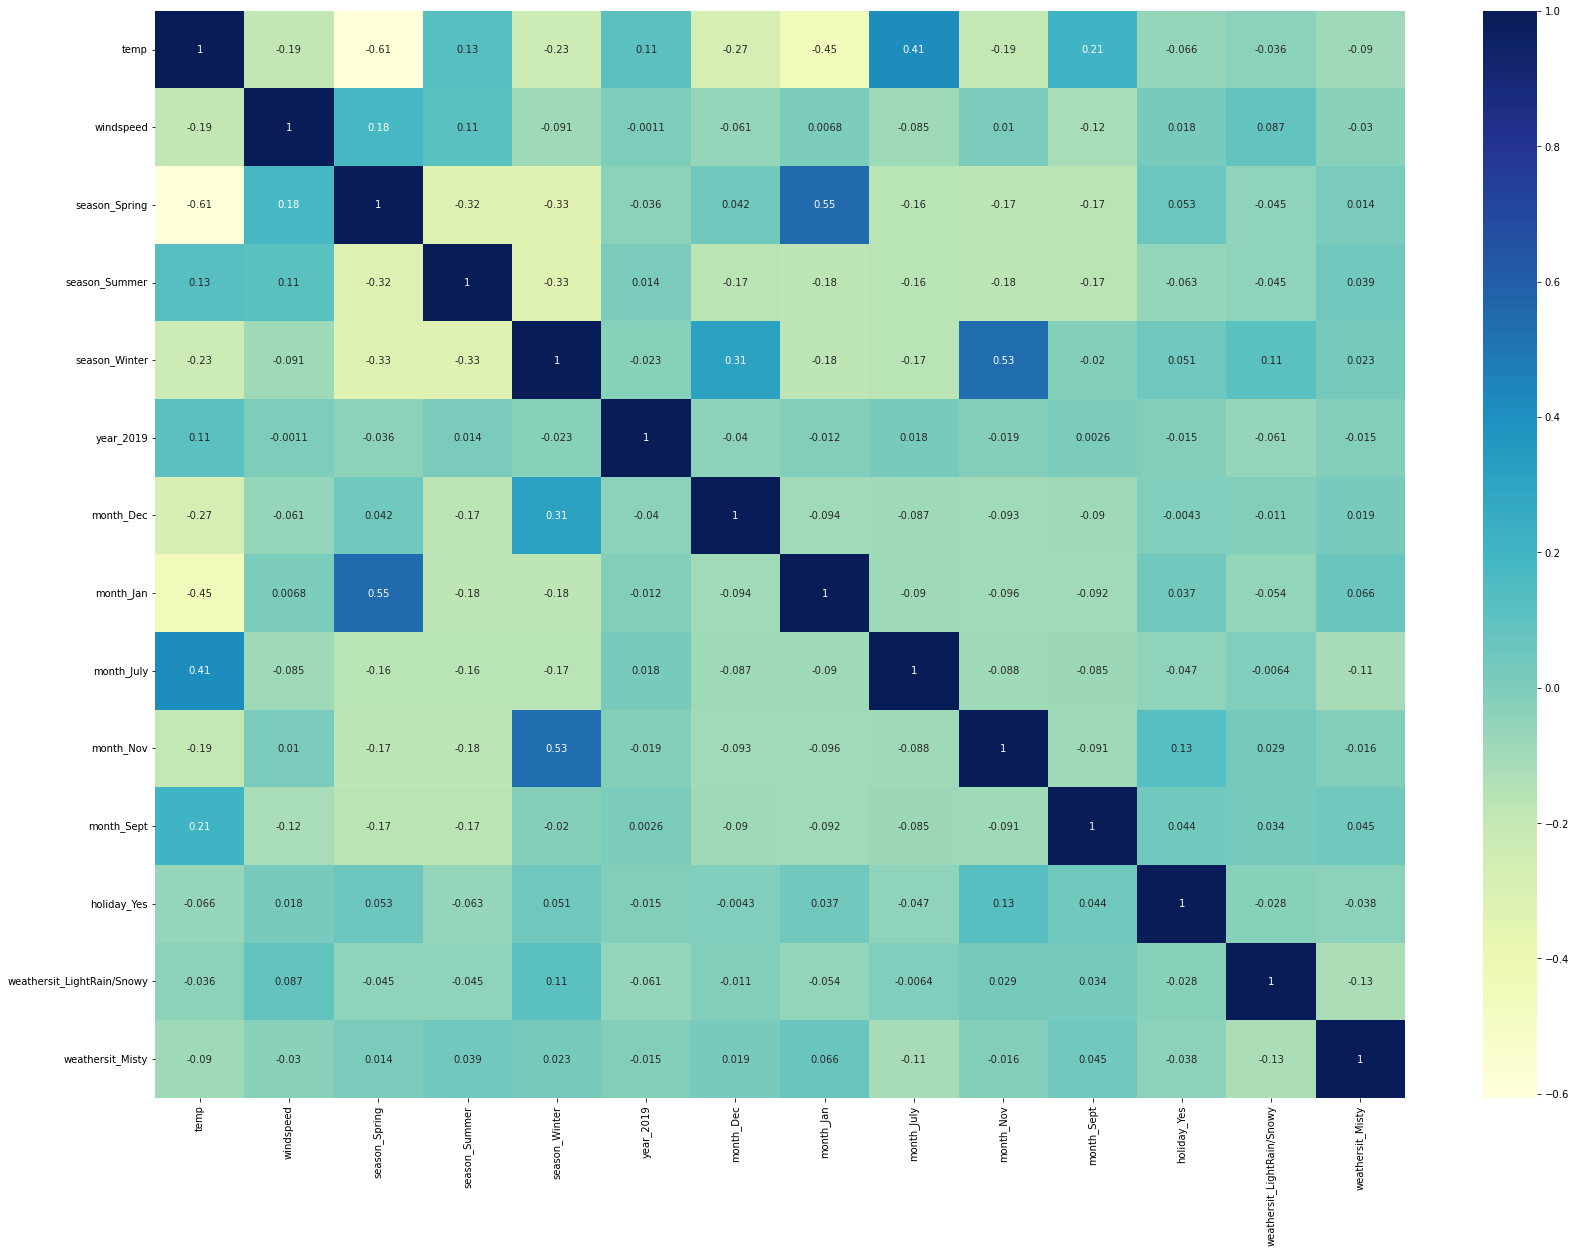

In [64]:
plt.figure(figsize = (28, 20))
sns.heatmap(x_train_new.corr(),annot = True, cmap="YlGnBu")
plt.show()

**Observation**

- season_Spring, month_July and Month_Jan shows significant negative correlation with temp variable
- also season_Spring and month_July have significant positive correlation between themselves.
- month_Nov and month_Dec are showing significant correlation with season_Winter

**Let's drop these features one by one.**

#### Dropping the season_Spring 

In [65]:
x= x_train_rfe.drop(['season_Spring'], axis=1)
x_train_rfe = sm.add_constant(x)
lm3 = sm.OLS(y_train,x_train_rfe).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.9
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          2.65e-185
Time:                        16:36:41   Log-Likelihood:                 499.93
No. Observations:                 510   AIC:                            -971.9
Df Residuals:                     496   BIC:                            -912.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1650      0.021      7.849      0.000       0.124       0.206
temp                           0.5209      0.027     19.637      0.000       0.469       0.573
windspeed                     -0.1659      0.025     -6.539      0.000      -0.216      -0.116
season_Summer                  0.0688      0.011      6.064      0.000       0.047       0.091
season_Winter                  0.1288      0.013      9.609      0.000       0.102       0.155
year_2019                      0.2330      0.008     28.296      0.000       0.217       0.249
month_Dec                     -0.0381      0.018     -2.149      0.032      -0.073      -0.003
month_Jan                     -0.0553      0.018     -2.994      0.003      -0.092      -0.019
month_July                    -0.0381      0.018     -2.081      0.038      -0.074      -0.002
month_Nov                     -0.0303      0.019     -1.602      0.110      -0.067       0.007
month_Sept                     0.0852      0.016      5.170      0.000       0.053       0.118
holiday_Yes                   -0.0961      0.026     -3.660      0.000      -0.148      -0.045
weathersit_LightRain/Snowy    -0.2894      0.025    -11.659      0.000      -0.338      -0.241
weathersit_Misty              -0.0803      0.009     -9.142      0.000      -0.098      -0.063
==============================================================================
Omnibus:                       59.040   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.091
Skew:                          -0.650   Prob(JB):                     6.87e-28
Kurtosis:                       5.048   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observation:**
- After dropping season_Spring feature, R-squared and Adj. R-squared dropped to 83.6% and 83.2% resp.
- Again, p values of all the variables is significant.
- Let's look into the Vif values as well.

#### Checking VIF 3

In [66]:
x_train_new=x_train_rfe.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                         temp  5.17
1                    windspeed  3.42
3                season_Winter  2.52
4                    year_2019  2.04
2                season_Summer  1.82
8                    month_Nov  1.80
12            weathersit_Misty  1.54
7                   month_July  1.52
5                    month_Dec  1.40
9                   month_Sept  1.31
6                    month_Jan  1.22
11  weathersit_LightRain/Snowy  1.09
10                 holiday_Yes  1.06

- nothing much changed after dropping season_Spring. 
- temp's Vif is still high

#### Dropping the  month_Jan feature

In [67]:
x= x_train_rfe.drop(['month_Jan'], axis=1)
x_train_rfe = sm.add_constant(x)
lm4 = sm.OLS(y_train,x_train_rfe).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     207.0
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          1.50e-184
Time:                        16:36:41   Log-Likelihood:                 495.36
No. Observations:                 510   AIC:                            -964.7
Df Residuals:                     497   BIC:                            -909.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1291      0.017      7.417      0.000       0.095       0.163
temp                           0.5618      0.023     24.519      0.000       0.517       0.607
windspeed                     -0.1554      0.025     -6.135      0.000      -0.205      -0.106
season_Summer                  0.0779      0.011      7.065      0.000       0.056       0.100
season_Winter                  0.1377      0.013     10.458      0.000       0.112       0.164
year_2019                      0.2319      0.008     27.968      0.000       0.216       0.248
month_Dec                     -0.0243      0.017     -1.409      0.159      -0.058       0.010
month_July                    -0.0396      0.018     -2.150      0.032      -0.076      -0.003
month_Nov                     -0.0220      0.019     -1.169      0.243      -0.059       0.015
month_Sept                     0.0889      0.017      5.370      0.000       0.056       0.121
holiday_Yes                   -0.0980      0.026     -3.706      0.000      -0.150      -0.046
weathersit_LightRain/Snowy    -0.2859      0.025    -11.438      0.000      -0.335      -0.237
weathersit_Misty              -0.0813      0.009     -9.188      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       56.363   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.813
Skew:                          -0.631   Prob(JB):                     4.31e-26
Kurtosis:                       4.977   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observation:**
- After dropping month_Jan feature, R-squared and Adj. R-squared dropped to 83.3% and 82.9% resp.
- p values of month_Dec and month_Nov increased.
- Let's look into the Vif values as well.

#### Checking VIF 4

In [68]:
x_train_new=x_train_rfe.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                         temp  5.09
1                    windspeed  3.16
3                season_Winter  2.49
4                    year_2019  2.01
7                    month_Nov  1.79
2                season_Summer  1.76
6                   month_July  1.52
11            weathersit_Misty  1.49
5                    month_Dec  1.39
8                   month_Sept  1.31
10  weathersit_LightRain/Snowy  1.09
9                  holiday_Yes  1.05

- let's drop month_Nov 

#### Dropping the month_Nov  feature

In [69]:
x= x_train_rfe.drop(['month_Nov'], axis=1)
x_train_rfe = sm.add_constant(x)
lm5 = sm.OLS(y_train,x_train_rfe).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.6
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          1.93e-185
Time:                        16:36:41   Log-Likelihood:                 494.66
No. Observations:                 510   AIC:                            -965.3
Df Residuals:                     498   BIC:                            -914.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1267      0.017      7.328      0.000       0.093       0.161
temp                           0.5654      0.023     24.882      0.000       0.521       0.610
windspeed                     -0.1561      0.025     -6.160      0.000      -0.206      -0.106
season_Summer                  0.0783      0.011      7.095      0.000       0.057       0.100
season_Winter                  0.1291      0.011     11.849      0.000       0.108       0.150
year_2019                      0.2320      0.008     27.968      0.000       0.216       0.248
month_Dec                     -0.0171      0.016     -1.059      0.290      -0.049       0.015
month_July                    -0.0403      0.018     -2.185      0.029      -0.077      -0.004
month_Sept                     0.0908      0.016      5.505      0.000       0.058       0.123
holiday_Yes                   -0.1015      0.026     -3.858      0.000      -0.153      -0.050
weathersit_LightRain/Snowy    -0.2841      0.025    -11.383      0.000      -0.333      -0.235
weathersit_Misty              -0.0809      0.009     -9.146      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       53.822   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.495
Skew:                          -0.614   Prob(JB):                     2.76e-24
Kurtosis:                       4.897   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observation:**
- After dropping month_Nov feature, R-squared and Adj. R-squared didn't change
- Again, p values of month_Dec is still high.
- Let's look into the Vif values as well.

#### Checking VIF 5

In [70]:
x_train_new=x_train_rfe.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                         temp  5.07
1                    windspeed  3.11
4                    year_2019  2.01
2                season_Summer  1.76
3                season_Winter  1.62
6                   month_July  1.52
10            weathersit_Misty  1.49
7                   month_Sept  1.29
5                    month_Dec  1.22
9   weathersit_LightRain/Snowy  1.08
8                  holiday_Yes  1.04

- vif of temp is still >5 
- Let's drop month_Dec

#### Dropping the month_dec feature

In [71]:
x= x_train_rfe.drop(['month_Dec'], axis=1)
x_train_rfe = sm.add_constant(x)
lm6 = sm.OLS(y_train,x_train_rfe).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.0
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          2.09e-186
Time:                        16:36:41   Log-Likelihood:                 494.09
No. Observations:                 510   AIC:                            -966.2
Df Residuals:                     499   BIC:                            -919.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1224      0.017      7.283      0.000       0.089       0.155
temp                           0.5700      0.022     25.569      0.000       0.526       0.614
windspeed                     -0.1540      0.025     -6.096      0.000      -0.204      -0.104
season_Summer                  0.0790      0.011      7.174      0.000       0.057       0.101
season_Winter                  0.1264      0.011     11.927      0.000       0.106       0.147
year_2019                      0.2321      0.008     27.983      0.000       0.216       0.248
month_July                    -0.0406      0.018     -2.205      0.028      -0.077      -0.004
month_Sept                     0.0917      0.016      5.569      0.000       0.059       0.124
holiday_Yes                   -0.1005      0.026     -3.823      0.000      -0.152      -0.049
weathersit_LightRain/Snowy    -0.2828      0.025    -11.345      0.000      -0.332      -0.234
weathersit_Misty              -0.0808      0.009     -9.135      0.000      -0.098      -0.063
==============================================================================
Omnibus:                       52.439   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.445
Skew:                          -0.604   Prob(JB):                     2.09e-23
Kurtosis:                       4.859   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observation:**
- After dropping month_Dec feature, R-squared dropped to 83.2% and Adj. R-squared didn't change.
- Now, p values of all the variables is significant.
- Let's look into the Vif values as well.

#### Checking VIF 6

In [72]:
x_train_new=x_train_rfe.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                        temp  5.06
1                   windspeed  3.09
4                   year_2019  2.01
2               season_Summer  1.75
5                  month_July  1.52
9            weathersit_Misty  1.49
3               season_Winter  1.46
6                  month_Sept  1.29
8  weathersit_LightRain/Snowy  1.08
7                 holiday_Yes  1.04

- vif of temp is still >5 
- Let's drop month_July and check

#### Dropping the Month_July 

In [73]:
x= x_train_rfe.drop(['month_July'], axis=1)
x_train_rfe = sm.add_constant(x)
lm7 = sm.OLS(y_train,x_train_rfe).fit()
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.9
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          1.37e-186
Time:                        16:36:41   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     500   BIC:                            -920.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1264      0.017      7.541      0.000       0.093       0.159
temp                           0.5480      0.020     27.381      0.000       0.509       0.587
windspeed                     -0.1533      0.025     -6.045      0.000      -0.203      -0.103
season_Summer                  0.0868      0.010      8.307      0.000       0.066       0.107
season_Winter                  0.1306      0.010     12.476      0.000       0.110       0.151
year_2019                      0.2328      0.008     27.973      0.000       0.216       0.249
month_Sept                     0.1011      0.016      6.327      0.000       0.070       0.132
holiday_Yes                   -0.0992      0.026     -3.761      0.000      -0.151      -0.047
weathersit_LightRain/Snowy    -0.2838      0.025    -11.344      0.000      -0.333      -0.235
weathersit_Misty              -0.0797      0.009     -8.995      0.000      -0.097      -0.062
==============================================================================
Omnibus:                       57.277   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.021
Skew:                          -0.648   Prob(JB):                     6.40e-26
Kurtosis:                       4.945   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observation:**
- After dropping month_July feature, R-squared and Adj. R-squared dropped to 83.1% and 82.8% resp.
- Again, p values of all the variables is significant.
- Let's look into the Vif values as well.

#### Checking VIF 7

In [74]:
x_train_new=x_train_rfe.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                        temp  3.68
1                   windspeed  3.05
4                   year_2019  2.00
2               season_Summer  1.56
8            weathersit_Misty  1.48
3               season_Winter  1.38
5                  month_Sept  1.20
7  weathersit_LightRain/Snowy  1.08
6                 holiday_Yes  1.03

- Finally, we have significant temp's VIF i.e. 3.68 
- VIF of other variables is also good.

- We have 9 features which have significant p-values and Vif values.

#### Dropping the season_Summer
as it has some correlation with season_winter

In [75]:
 x= x_train_rfe.drop(['season_Summer'], axis=1)
x_train_rfe = sm.add_constant(x)
lm8 = sm.OLS(y_train,x_train_rfe).fit()
lm8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     262.7
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          8.04e-174
Time:                        16:36:42   Log-Likelihood:                 458.65
No. Observations:                 510   AIC:                            -899.3
Df Residuals:                     501   BIC:                            -861.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1385      0.018      7.782      0.000       0.104       0.174
temp                           0.5672      0.021     26.769      0.000       0.526       0.609
windspeed                     -0.1347      0.027     -5.004      0.000      -0.188      -0.082
season_Winter                  0.1049      0.011      9.843      0.000       0.084       0.126
year_2019                      0.2325      0.009     26.213      0.000       0.215       0.250
month_Sept                     0.0750      0.017      4.493      0.000       0.042       0.108
holiday_Yes                   -0.1066      0.028     -3.794      0.000      -0.162      -0.051
weathersit_LightRain/Snowy    -0.2840      0.027    -10.650      0.000      -0.336      -0.232
weathersit_Misty              -0.0745      0.009     -7.907      0.000      -0.093      -0.056
==============================================================================
Omnibus:                       41.507   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.844
Skew:                          -0.521   Prob(JB):                     5.60e-17
Kurtosis:                       4.561   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observation:**
- After dropping season_Summer feature, R-squared and Adj. R-squared dropped to 80.7% and 80.4% respectively 
- Again, p values of all the variables is significant.


#### Checking VIF 8

In [76]:
x_train_new=x_train_rfe.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                        temp  3.42
1                   windspeed  2.95
3                   year_2019  2.00
7            weathersit_Misty  1.46
2               season_Winter  1.27
4                  month_Sept  1.16
6  weathersit_LightRain/Snowy  1.08
5                 holiday_Yes  1.03

- VIF values are good

**Observation:**

- Top 3 variables that affect the demand of bikes in positive way are:
    - Temperature
    - year_2019 -> it tells that bike count increased from 2018 to 2019 and thus demand is increasing and avaialibilty of bikes should be kept in the priority List. 
    - winter season
    
- Now, We have our final model. So, Let's do the residual Analysis of the train dataset.

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed let us plot the histogram of the error terms and see what it looks like.

In [77]:
y_train_pred = lm8.predict(x_train_rfe)
res_df=y_train - y_train_pred

#### Checking if normally Distributed or not

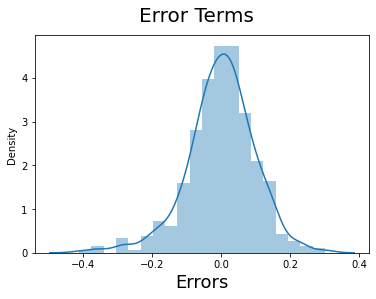

In [78]:
fig = plt.figure()
sns.distplot(res_df, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)
plt.show()

**Observation**
- Here, as we can see the error terms are normally distributed. Hence our assumption of L.R is also valid.
- We can say that our model is good.

#### Checking if error terms have constant variance or not

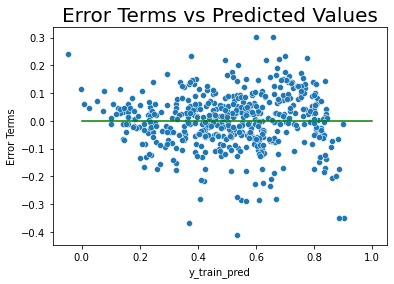

In [79]:
p = sns.scatterplot(y_train_pred,res_df)
plt.xlabel('y_train_pred')
plt.ylabel('Error Terms')

p = sns.lineplot([0,1],[0,0],color='green')
p = plt.title('Error Terms vs Predicted Values', fontsize = 20)

**Observation:**
- we can see in the plot that error terms have constant variance

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to make predictions using the final, i.e. second model.

In [80]:
num_vars =list(bike_test.select_dtypes(['int64','float64']).columns)
num_vars

['temp', 'humidity', 'windspeed', 'count']

### Scaling the test dataset's numerical variables
- we fit training dataset
- we never fit the test dataset, but transform

In [81]:
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.describe()

temp    humidity   windspeed       count  season_Spring  \
count  219.000000  219.000000  219.000000  219.000000     219.000000   
mean     0.558941    0.638508    0.313350    0.520592       0.255708   
std      0.233698    0.148974    0.159947    0.218435       0.437258   
min      0.046591    0.261915   -0.042808    0.048205       0.000000   
25%      0.354650    0.527265    0.198517    0.377531       0.000000   
50%      0.558691    0.627737    0.299459    0.524275       0.000000   
75%      0.759096    0.743928    0.403048    0.672745       1.000000   
max      0.984424    1.002146    0.807474    0.963300       1.000000   

       season_Summer  season_Winter   year_2019   month_Aug   month_Dec  ...  \
count     219.000000     219.000000  219.000000  219.000000  219.000000  ...   
mean        0.264840       0.232877    0.479452    0.059361    0.086758  ...   
std         0.442259       0.423633    0.500722    0.236840    0.282125  ...   
min         0.000000       0.000000    0.000000    0.000000    0.000000  ...   
25%         0.000000       0.000000    0.000000    0.000000    0.000000  ...   
50%         0.000000       0.000000    0.000000    0.000000    0.000000  ...   
75%         1.000000       0.000000    1.000000    0.000000    0.000000  ...   
max         1.000000       1.000000    1.000000    1.000000    1.000000  ...   

       holiday_Yes  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  \
count   219.000000   219.000000   219.000000   219.000000   219.000000   
mean      0.036530     0.118721     0.173516     0.155251     0.141553   
std       0.188034     0.324202     0.379560     0.362974     0.349389   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       weekday_Tue  weekday_Wed  workingday_Yes  weathersit_LightRain/Snowy  \
count   219.000000   219.000000      219.000000                  219.000000   
mean      0.123288     0.155251        0.639269                    0.027397   
std       0.329520     0.362974        0.481313                    0.163612   
min       0.000000     0.000000        0.000000                    0.000000   
25%       0.000000     0.000000        0.000000                    0.000000   
50%       0.000000     0.000000        1.000000                    0.000000   
75%       0.000000     0.000000        1.000000                    0.000000   
max       1.000000     1.000000        1.000000                    1.000000   

       weathersit_Misty  
count        219.000000  
mean           0.319635  
std            0.467403  
min            0.000000  
25%            0.000000  
50%            0.000000  
75%            1.000000  
max            1.000000  

[8 rows x 29 columns]

### Dividing into x_test and y_test

In [82]:
y_test = bike_test.pop('count')
x_test = bike_test

In [83]:
#using the selected features in test dataset
x_test_new = x_test[x_train_new.columns]

#adding the constant
x_test_m = sm.add_constant(x_test_new)

#predicting the count
y_pred_m = lm8.predict(x_test_m)

## Step 9: Model Evaluation

Text(0, 0.5, 'y_pred')

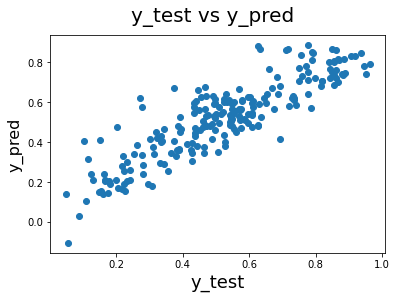

In [84]:
# Plotting y_test and y_pred_m to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred_m)
fig.suptitle('y_test vs y_pred', fontsize = 20)   
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)      

**Observation**
- We can see the linear relationship between the y_test and y_pred_m, which makes our another assumption about linear relationship between dependent and independent variable, valid.

### Residual Analysis for Test

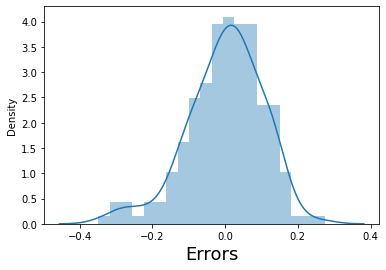

In [85]:
res_df2=y_test - y_pred_m
sns.distplot(res_df2, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)
plt.show()

**Observation**
- Here, as we can see the error terms are normaly distributed.

## Evaluating R-Squared and Adj. R-Squared

In [86]:
#calculating R2 for test and train dataset

r2_train=round(r2_score(y_true=y_train,y_pred=y_train_pred),4)*100
r2_test=round(r2_score(y_true=y_test,y_pred=y_pred_m),4)*100

print(f'Train R-Squared: {r2_train}% \nTest  R-Squared: {r2_test}%')

print(40 * '-')

# Adjusted R2 for test and train dataset
# for test

n= x_test_new.shape[0]
p=x_test_new.shape[1]

n2= x_train_new.shape[0]
p2=x_train_new.shape[1]

adj_test= round(1-(1-r2_test)*(n-1)/(n-p-1),2)

adj_train= round(1-(1-r2_train)*(n2-1)/(n2-p2-1),2)

print(f'Train Adjusted R-Squared: {adj_train}% \nTest  Adjusted R-Squared: {adj_test}%')

Train R-Squared: 80.75% 
Test  R-Squared: 77.14%
----------------------------------------
Train Adjusted R-Squared: 82.02% 
Test  Adjusted R-Squared: 80.04%


**Observation:**
- R squared value seems good and the model is a decent one as well.

## Model Interpretation
    

In [87]:
# checking the coefficients of each feature
round(lm7.params,4)

const                         0.1264
temp                          0.5480
windspeed                    -0.1533
season_Summer                 0.0868
season_Winter                 0.1306
year_2019                     0.2328
month_Sept                    0.1011
holiday_Yes                  -0.0992
weathersit_LightRain/Snowy   -0.2838
weathersit_Misty             -0.0797
dtype: float64

The equation of our best fitted line is:
 <br>
 <br>
$ count = 0.5672 \times  temp + 0.2325  \times year2019 + 0.1049 \times seasonWinter + 
          0.075 \times monthSept - 0.1347 \times windspeed - 0.1066 \times holidayYes - 
          0.2840 \times weathersitLightRain/Snowy - 0.0745 \times weathersitMisty + 0.1385 $
          
     

### Interpreting the coefficients

As per our model:

- **Temperature** - a unit increase in temperature *increases* the demand of bikes  by **0.5672** units. 
- **weather(LightRain, LightSnowy)**-  a unit increase in this feature *decreases* the demand of bikes  by **0.2840** units.

- **year_2019** -  a unit increase in this feature *increases* the demand of bikes  by **0.2325** units.

- **Windspeed** -  a unit increase in windspeed *decreases* the demand of bikes  by **0.1347** units.

- **holiday** - a unit increase in holiday *decreases* the demand of bikes  by **0.1066** units.

- **Winter Season** -  a unit increase in winter season *increases* the demand of bikes  by **0.1049** units.

- **Month of September** -  a unit increase in this feature *increases* the demand of bikes  by **0.0750** units.

- **weather / Misty +Cloudy** - a unit increase in this feature, *decreases* the demand of bikes  by **0.0745** units.

- **const**- It tells us that in absense of all the above factors, bikes' demand still increases by **0.1385** units.

### Hypothesis Testing
To test if coefffcients are significant or not.
- H0: B=0 (coefficient equal to zero--> not significant)
- H1: B!=0 (coefficient not equal to zero--> significant)

From the final model, it is clear that the coefficients and not equal to zero. 
Hence, **we Reject The Null Hypothesis**.

### Evaluating F-Statistic
- It tells us whether the overall model fit is significant or not
- This parameter is examined because many a times even though the coefficients are significant, but overall model fit might happend just by chance.

From the final model, we have **F-Statistic value as 262.7** and **Prob (F-statistic) ~ 0** , which is significant. Hence, the final model fit is significant.

## Conclusion


**Top 3 features which affect the demand of the bikes:**
<br>

- Temperature (positively)
- Light Snow, LightRain+ Thunderstorm + scattered Clouds,  LightRain + scattered Clouds(negatively)
- year_2019 (positively)
